In [2]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn


In [3]:
# eig[0]

In [4]:
# import math
# l1 = torch.max(eig[0])
# eps = 0.9999999999
# delta = 0.99
# p = 20 * torch.log(torch.tensor(2 / delta)) / pow(eps, 2)
# p = torch.ceil(p)
# p.type(torch.LongTensor)

In [5]:
# import torch.distributions
# from torch.distributions.multivariate_normal import MultivariateNormal
# mu = 15 * torch.randn(n)
# v = 100 * torch.randn(n)
# d = torch.diagflat(v)
# covar = torch.mm(d, d.t())
# dis = MultivariateNormal(loc = mu, covariance_matrix = covar)

In [6]:
# dis.mean

In [7]:
# g = []
# for i in range(int(p.item())):
#     g.append(dis.sample())

In [8]:
# y = 0
# for i in range(int(p.item())):
#     y += torch.matmul(torch.matmul(g[i].t(), sigma), g[i])
# y

In [9]:
# torch.trace(sigma), torch.trace(A)

In [10]:
# torch.FloatTensor(10).uniform_(-1., 1.)

In [11]:
# # Approximating the maximal eigenvalue of a matrix
# q = 5
# t = 5
# res = []
# for j in range(q):
#     x = torch.randint(low = -1, high = 1, size = (n, ))
#     x[x == 0] = 1
#     x = x.type(torch.FloatTensor)
#     for i in range(t):
#         x = torch.matmul(sigma, x)
#     lam = torch.matmul(torch.matmul(x.t(), sigma), x) / torch.matmul(x.t(), x)
#     res.append(lam)

# res.sort()
# expected = res[len(res) - 1]
# actual = eig[0].max()

In [12]:
# expected, actual

In [80]:
# Approximations to Maximal Eigenvalue of a matrix
Z = torch.randn(500, 500)
def Approximation(A):
    n = A.shape[0]
#     A = torch.randn(n, n)
    sigma = torch.mm(A, A.t())
    eig = torch.symeig(sigma, eigenvectors = False)
    q = 5
    t = 5
    res = []
    for j in range(q):
        x = torch.randint(low = -1, high = 1, size = (n, ))
        x[x == 0] = 1
        x = x.type(torch.FloatTensor)
        for i in range(t):
            x = torch.matmul(sigma, x)
        lam = torch.matmul(torch.matmul(x.t(), sigma), x) / torch.matmul(x.t(), x)
        res.append(lam)

    res.sort()
    expected = res[len(res) - 1]
    actual = eig[0].max()
    return expected, actual

In [81]:
X, Y = Approximation(Z)
X, Y

(tensor(1841.0642), tensor(1985.1555))

In [93]:
n_val = [5, 20, 50, 100, 200, 300, 500, 600]
estimate = []

for i in n_val:
    Z = torch.randn(i, i)
    estimate.append(Approximation(Z))

In [94]:
estimate #Estimated values were found to be lower than the actual values

[(tensor(15.6347), tensor(15.7265)),
 (tensor(74.6144), tensor(74.6210)),
 (tensor(200.5778), tensor(203.5668)),
 (tensor(338.5546), tensor(351.3207)),
 (tensor(738.7623), tensor(810.1147)),
 (tensor(1079.9635), tensor(1177.3486)),
 (tensor(1875.2168), tensor(1961.0262)),
 (tensor(2169.5303), tensor(2388.0361))]

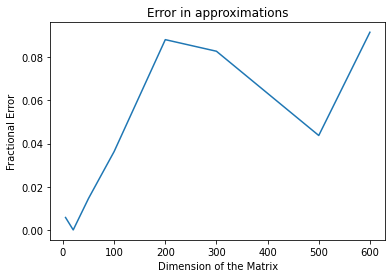

In [95]:
def Error(Estimates, dims):
    S = len(dims)
    X = torch.tensor(dims)
    Y = torch.randn(S)
    for i in range(len(dims)):
        expected, actual = Estimates[i]
        error = (expected - actual) / actual
        error = error.abs()
        Y[i] = error.item()
    return Y, X

Y, X = Error(estimate, n_val)
Y = Y.numpy()
X = X.numpy()
from matplotlib import pyplot as plt
plt.title('Error in approximations')
plt.ylabel('Fractional Error')
plt.xlabel('Dimension of the Matrix')
plt.plot(X, Y)
plt.show()

In [111]:
# Estimation of optimal solutions of ||Ax - b|| ^ 2 + ||x||_{1}
import torch.optim as optim
import math
n = 500
lam = 0.5
X = torch.randn(n)
X.requires_grad_(True)
A = torch.randn(n, n)
b = torch.randn(n, )
sigma = torch.mm(A.t(), A)
eig = torch.symeig(sigma, eigenvectors = False)
step_size = 0.8 * 1 / eig[0].max()
optimizer = optim.SGD([X], lr = 0.0001, momentum = 0.9)

In [112]:
# Objective function 
def objective(X):
    matrix = torch.matmul(A, X) - b
    term_1 = torch.norm(matrix)
    term_1 = term_1 * term_1
    return term_1 + lam * X.abs().sum()

objective(X)

tensor(282587.6562, grad_fn=<AddBackward0>)

In [113]:
# Custom Optimizer in Pytorch
epochs = 0
eps = 0.00000001
while True:
    optimizer.zero_grad()
    loss = objective(X)
    loss_prev = loss
    loss.backward()
    print("Current loss is : {} at iteration : {}".format(loss, epochs))
    epochs += 1
    optimizer.step()
    loss_new = objective(X)
    frac = (loss_prev - loss_new) / loss_prev
    frac = frac.abs()
    if frac.item() < eps:
        break

Current loss is : 282587.65625 at iteration : 0
Current loss is : 181415.6875 at iteration : 1
Current loss is : 77682.3125 at iteration : 2
Current loss is : 45948.578125 at iteration : 3
Current loss is : 74261.9453125 at iteration : 4
Current loss is : 102756.0234375 at iteration : 5
Current loss is : 96554.5078125 at iteration : 6
Current loss is : 69546.5703125 at iteration : 7
Current loss is : 51421.84375 at iteration : 8
Current loss is : 51259.5703125 at iteration : 9
Current loss is : 56183.078125 at iteration : 10
Current loss is : 53269.65234375 at iteration : 11
Current loss is : 42968.65234375 at iteration : 12
Current loss is : 33449.67578125 at iteration : 13
Current loss is : 29502.224609375 at iteration : 14
Current loss is : 29461.330078125 at iteration : 15
Current loss is : 29421.05078125 at iteration : 16
Current loss is : 27232.970703125 at iteration : 17
Current loss is : 23117.44140625 at iteration : 18
Current loss is : 18675.67578125 at iteration : 19
Current

Current loss is : 50.349151611328125 at iteration : 195
Current loss is : 50.27852249145508 at iteration : 196
Current loss is : 50.208831787109375 at iteration : 197
Current loss is : 50.13993453979492 at iteration : 198
Current loss is : 50.07184982299805 at iteration : 199
Current loss is : 50.004600524902344 at iteration : 200
Current loss is : 49.93809127807617 at iteration : 201
Current loss is : 49.872291564941406 at iteration : 202
Current loss is : 49.807167053222656 at iteration : 203
Current loss is : 49.74288558959961 at iteration : 204
Current loss is : 49.67940902709961 at iteration : 205
Current loss is : 49.61650848388672 at iteration : 206
Current loss is : 49.55419158935547 at iteration : 207
Current loss is : 49.492469787597656 at iteration : 208
Current loss is : 49.431575775146484 at iteration : 209
Current loss is : 49.37126159667969 at iteration : 210
Current loss is : 49.31204605102539 at iteration : 211
Current loss is : 49.253883361816406 at iteration : 212
Cu

Current loss is : 44.21284866333008 at iteration : 420
Current loss is : 44.204368591308594 at iteration : 421
Current loss is : 44.19582748413086 at iteration : 422
Current loss is : 44.18732833862305 at iteration : 423
Current loss is : 44.178932189941406 at iteration : 424
Current loss is : 44.17048645019531 at iteration : 425
Current loss is : 44.16221618652344 at iteration : 426
Current loss is : 44.15399169921875 at iteration : 427
Current loss is : 44.14580535888672 at iteration : 428
Current loss is : 44.13768768310547 at iteration : 429
Current loss is : 44.129547119140625 at iteration : 430
Current loss is : 44.12148666381836 at iteration : 431
Current loss is : 44.113548278808594 at iteration : 432
Current loss is : 44.105552673339844 at iteration : 433
Current loss is : 44.09762191772461 at iteration : 434
Current loss is : 44.089698791503906 at iteration : 435
Current loss is : 44.08184814453125 at iteration : 436
Current loss is : 44.07407760620117 at iteration : 437
Curr

Current loss is : 43.140586853027344 at iteration : 663
Current loss is : 43.138797760009766 at iteration : 664
Current loss is : 43.13709259033203 at iteration : 665
Current loss is : 43.135467529296875 at iteration : 666
Current loss is : 43.133785247802734 at iteration : 667
Current loss is : 43.132240295410156 at iteration : 668
Current loss is : 43.130619049072266 at iteration : 669
Current loss is : 43.128841400146484 at iteration : 670
Current loss is : 43.12714767456055 at iteration : 671
Current loss is : 43.125648498535156 at iteration : 672
Current loss is : 43.12401580810547 at iteration : 673
Current loss is : 43.122249603271484 at iteration : 674
Current loss is : 43.1207389831543 at iteration : 675
Current loss is : 43.11927795410156 at iteration : 676
Current loss is : 43.117645263671875 at iteration : 677
Current loss is : 43.116050720214844 at iteration : 678
Current loss is : 43.11439514160156 at iteration : 679
Current loss is : 43.11283874511719 at iteration : 680


Current loss is : 42.856964111328125 at iteration : 930
Current loss is : 42.85633087158203 at iteration : 931
Current loss is : 42.855796813964844 at iteration : 932
Current loss is : 42.85517883300781 at iteration : 933
Current loss is : 42.854530334472656 at iteration : 934
Current loss is : 42.854068756103516 at iteration : 935
Current loss is : 42.853424072265625 at iteration : 936
Current loss is : 42.8529052734375 at iteration : 937
Current loss is : 42.85227966308594 at iteration : 938
Current loss is : 42.851722717285156 at iteration : 939
Current loss is : 42.85118865966797 at iteration : 940
Current loss is : 42.850746154785156 at iteration : 941
Current loss is : 42.850135803222656 at iteration : 942
Current loss is : 42.84947967529297 at iteration : 943
Current loss is : 42.848968505859375 at iteration : 944
Current loss is : 42.848548889160156 at iteration : 945
Current loss is : 42.84794616699219 at iteration : 946
Current loss is : 42.84724426269531 at iteration : 947
C

In [137]:
X_final = X

def prox(v, lmbda):
    return np.sign(v) * np.maximum(np.abs(v) - lmbda, 0.)

# Soft thresholding operator
def proximal(v, lam):
    return torch.sign(v) * torch.max(v.abs() - lam, torch.zeros(v.shape[0], ))
estimate, actual = Approximation(A)
L_app = 2 * estimate
L = 2 * eig[0].max()
step_size = 1 / L
L, L_app

(tensor(4012.5103), tensor(3695.4387))

In [138]:
# ISTA without backtracking
x = torch.randn(n, )
print(objective(x))
ista = 0
while True:
    loss = objective(x)
    loss_prev = loss
    print("Loss is : {} at iteration : {}".format(loss, ista))
    ista += 1
    grad = 2 * torch.matmul(A.t(), torch.matmul(A, x) - b)
    x = x - step_size * grad
    x = proximal(x, step_size * lam)
    loss_new = objective(x)
    frac = (loss_prev - loss_new) / loss_prev
    frac = frac.abs()
    if frac.item() < eps:
        break

tensor(232676.0781)
Loss is : 232676.078125 at iteration : 0
Loss is : 74818.5390625 at iteration : 1
Loss is : 39802.046875 at iteration : 2
Loss is : 25387.83984375 at iteration : 3
Loss is : 17902.177734375 at iteration : 4
Loss is : 13449.712890625 at iteration : 5
Loss is : 10558.79296875 at iteration : 6
Loss is : 8565.3681640625 at iteration : 7
Loss is : 7128.87060546875 at iteration : 8
Loss is : 6058.240234375 at iteration : 9
Loss is : 5237.7880859375 at iteration : 10
Loss is : 4594.16162109375 at iteration : 11
Loss is : 4079.048095703125 at iteration : 12
Loss is : 3659.573486328125 at iteration : 13
Loss is : 3312.734130859375 at iteration : 14
Loss is : 3021.9384765625 at iteration : 15
Loss is : 2775.06689453125 at iteration : 16
Loss is : 2563.220703125 at iteration : 17
Loss is : 2379.584228515625 at iteration : 18
Loss is : 2219.017333984375 at iteration : 19
Loss is : 2077.53955078125 at iteration : 20
Loss is : 1952.034423828125 at iteration : 21
Loss is : 1839.88

Loss is : 83.36463165283203 at iteration : 462
Loss is : 83.26889038085938 at iteration : 463
Loss is : 83.17344665527344 at iteration : 464
Loss is : 83.07864379882812 at iteration : 465
Loss is : 82.98424530029297 at iteration : 466
Loss is : 82.89018249511719 at iteration : 467
Loss is : 82.79644775390625 at iteration : 468
Loss is : 82.70303344726562 at iteration : 469
Loss is : 82.60990905761719 at iteration : 470
Loss is : 82.51713562011719 at iteration : 471
Loss is : 82.42460632324219 at iteration : 472
Loss is : 82.3323974609375 at iteration : 473
Loss is : 82.24043273925781 at iteration : 474
Loss is : 82.1488037109375 at iteration : 475
Loss is : 82.05743408203125 at iteration : 476
Loss is : 81.96653747558594 at iteration : 477
Loss is : 81.876220703125 at iteration : 478
Loss is : 81.7862548828125 at iteration : 479
Loss is : 81.69648742675781 at iteration : 480
Loss is : 81.60707092285156 at iteration : 481
Loss is : 81.5181884765625 at iteration : 482
Loss is : 81.429718

Loss is : 59.240257263183594 at iteration : 913
Loss is : 59.210357666015625 at iteration : 914
Loss is : 59.18048858642578 at iteration : 915
Loss is : 59.15066909790039 at iteration : 916
Loss is : 59.12092590332031 at iteration : 917
Loss is : 59.091270446777344 at iteration : 918
Loss is : 59.061798095703125 at iteration : 919
Loss is : 59.03240203857422 at iteration : 920
Loss is : 59.00311279296875 at iteration : 921
Loss is : 58.97386169433594 at iteration : 922
Loss is : 58.94478225708008 at iteration : 923
Loss is : 58.9157829284668 at iteration : 924
Loss is : 58.8868522644043 at iteration : 925
Loss is : 58.858001708984375 at iteration : 926
Loss is : 58.829227447509766 at iteration : 927
Loss is : 58.80048370361328 at iteration : 928
Loss is : 58.77177810668945 at iteration : 929
Loss is : 58.74315643310547 at iteration : 930
Loss is : 58.714569091796875 at iteration : 931
Loss is : 58.686058044433594 at iteration : 932
Loss is : 58.65754699707031 at iteration : 933
Loss is

Loss is : 50.26304626464844 at iteration : 1368
Loss is : 50.25002670288086 at iteration : 1369
Loss is : 50.23698043823242 at iteration : 1370
Loss is : 50.2239990234375 at iteration : 1371
Loss is : 50.21099853515625 at iteration : 1372
Loss is : 50.19805145263672 at iteration : 1373
Loss is : 50.185089111328125 at iteration : 1374
Loss is : 50.172157287597656 at iteration : 1375
Loss is : 50.159263610839844 at iteration : 1376
Loss is : 50.14634704589844 at iteration : 1377
Loss is : 50.13348388671875 at iteration : 1378
Loss is : 50.120643615722656 at iteration : 1379
Loss is : 50.10786437988281 at iteration : 1380
Loss is : 50.09507751464844 at iteration : 1381
Loss is : 50.082313537597656 at iteration : 1382
Loss is : 50.06958770751953 at iteration : 1383
Loss is : 50.056884765625 at iteration : 1384
Loss is : 50.04417037963867 at iteration : 1385
Loss is : 50.031494140625 at iteration : 1386
Loss is : 50.018836975097656 at iteration : 1387
Loss is : 50.00617980957031 at iteratio

Loss is : 46.18125915527344 at iteration : 1841
Loss is : 46.175498962402344 at iteration : 1842
Loss is : 46.16973114013672 at iteration : 1843
Loss is : 46.163970947265625 at iteration : 1844
Loss is : 46.158241271972656 at iteration : 1845
Loss is : 46.15250015258789 at iteration : 1846
Loss is : 46.146766662597656 at iteration : 1847
Loss is : 46.141014099121094 at iteration : 1848
Loss is : 46.13526916503906 at iteration : 1849
Loss is : 46.129547119140625 at iteration : 1850
Loss is : 46.123809814453125 at iteration : 1851
Loss is : 46.11809158325195 at iteration : 1852
Loss is : 46.11235427856445 at iteration : 1853
Loss is : 46.106651306152344 at iteration : 1854
Loss is : 46.100914001464844 at iteration : 1855
Loss is : 46.09519958496094 at iteration : 1856
Loss is : 46.08949279785156 at iteration : 1857
Loss is : 46.08379364013672 at iteration : 1858
Loss is : 46.078086853027344 at iteration : 1859
Loss is : 46.0723762512207 at iteration : 1860
Loss is : 46.066688537597656 at

Loss is : 44.287208557128906 at iteration : 2316
Loss is : 44.284461975097656 at iteration : 2317
Loss is : 44.281707763671875 at iteration : 2318
Loss is : 44.27893829345703 at iteration : 2319
Loss is : 44.27617645263672 at iteration : 2320
Loss is : 44.273433685302734 at iteration : 2321
Loss is : 44.27070617675781 at iteration : 2322
Loss is : 44.268035888671875 at iteration : 2323
Loss is : 44.26539993286133 at iteration : 2324
Loss is : 44.262779235839844 at iteration : 2325
Loss is : 44.26016616821289 at iteration : 2326
Loss is : 44.25756072998047 at iteration : 2327
Loss is : 44.254981994628906 at iteration : 2328
Loss is : 44.25244140625 at iteration : 2329
Loss is : 44.249916076660156 at iteration : 2330
Loss is : 44.247413635253906 at iteration : 2331
Loss is : 44.244911193847656 at iteration : 2332
Loss is : 44.242435455322266 at iteration : 2333
Loss is : 44.23994445800781 at iteration : 2334
Loss is : 44.23747253417969 at iteration : 2335
Loss is : 44.235015869140625 at 

Loss is : 43.50505065917969 at iteration : 2762
Loss is : 43.5039176940918 at iteration : 2763
Loss is : 43.50276184082031 at iteration : 2764
Loss is : 43.501625061035156 at iteration : 2765
Loss is : 43.5004997253418 at iteration : 2766
Loss is : 43.499359130859375 at iteration : 2767
Loss is : 43.498233795166016 at iteration : 2768
Loss is : 43.49711608886719 at iteration : 2769
Loss is : 43.4959716796875 at iteration : 2770
Loss is : 43.49486541748047 at iteration : 2771
Loss is : 43.493743896484375 at iteration : 2772
Loss is : 43.49260711669922 at iteration : 2773
Loss is : 43.491477966308594 at iteration : 2774
Loss is : 43.49037170410156 at iteration : 2775
Loss is : 43.4892578125 at iteration : 2776
Loss is : 43.488136291503906 at iteration : 2777
Loss is : 43.487037658691406 at iteration : 2778
Loss is : 43.485923767089844 at iteration : 2779
Loss is : 43.484806060791016 at iteration : 2780
Loss is : 43.483699798583984 at iteration : 2781
Loss is : 43.48258972167969 at iterat

Loss is : 43.21593475341797 at iteration : 3086
Loss is : 43.21525192260742 at iteration : 3087
Loss is : 43.214561462402344 at iteration : 3088
Loss is : 43.21388244628906 at iteration : 3089
Loss is : 43.21320724487305 at iteration : 3090
Loss is : 43.21251678466797 at iteration : 3091
Loss is : 43.21184539794922 at iteration : 3092
Loss is : 43.21116256713867 at iteration : 3093
Loss is : 43.21050262451172 at iteration : 3094
Loss is : 43.20983123779297 at iteration : 3095
Loss is : 43.20915985107422 at iteration : 3096
Loss is : 43.20849609375 at iteration : 3097
Loss is : 43.20783996582031 at iteration : 3098
Loss is : 43.2071647644043 at iteration : 3099
Loss is : 43.206504821777344 at iteration : 3100
Loss is : 43.205841064453125 at iteration : 3101
Loss is : 43.205169677734375 at iteration : 3102
Loss is : 43.20450210571289 at iteration : 3103
Loss is : 43.20384979248047 at iteration : 3104
Loss is : 43.203189849853516 at iteration : 3105
Loss is : 43.20252990722656 at iteratio

Loss is : 43.007545471191406 at iteration : 3563
Loss is : 43.007286071777344 at iteration : 3564
Loss is : 43.00700378417969 at iteration : 3565
Loss is : 43.00672912597656 at iteration : 3566
Loss is : 43.0064582824707 at iteration : 3567
Loss is : 43.006168365478516 at iteration : 3568
Loss is : 43.005889892578125 at iteration : 3569
Loss is : 43.00562286376953 at iteration : 3570
Loss is : 43.00535583496094 at iteration : 3571
Loss is : 43.00507354736328 at iteration : 3572
Loss is : 43.004798889160156 at iteration : 3573
Loss is : 43.0045280456543 at iteration : 3574
Loss is : 43.0042610168457 at iteration : 3575
Loss is : 43.003990173339844 at iteration : 3576
Loss is : 43.00371551513672 at iteration : 3577
Loss is : 43.00343322753906 at iteration : 3578
Loss is : 43.003170013427734 at iteration : 3579
Loss is : 43.002899169921875 at iteration : 3580
Loss is : 43.00263595581055 at iteration : 3581
Loss is : 43.002357482910156 at iteration : 3582
Loss is : 43.0020866394043 at iter

Loss is : 42.91516876220703 at iteration : 4028
Loss is : 42.9150390625 at iteration : 4029
Loss is : 42.91490936279297 at iteration : 4030
Loss is : 42.91474151611328 at iteration : 4031
Loss is : 42.914608001708984 at iteration : 4032
Loss is : 42.914466857910156 at iteration : 4033
Loss is : 42.91431427001953 at iteration : 4034
Loss is : 42.9141731262207 at iteration : 4035
Loss is : 42.914039611816406 at iteration : 4036
Loss is : 42.913902282714844 at iteration : 4037
Loss is : 42.91374969482422 at iteration : 4038
Loss is : 42.91360855102539 at iteration : 4039
Loss is : 42.9134521484375 at iteration : 4040
Loss is : 42.913330078125 at iteration : 4041
Loss is : 42.913169860839844 at iteration : 4042
Loss is : 42.91304016113281 at iteration : 4043
Loss is : 42.91288375854492 at iteration : 4044
Loss is : 42.912757873535156 at iteration : 4045
Loss is : 42.9126091003418 at iteration : 4046
Loss is : 42.91246795654297 at iteration : 4047
Loss is : 42.91232681274414 at iteration : 

Loss is : 42.85927200317383 at iteration : 4490
Loss is : 42.859153747558594 at iteration : 4491
Loss is : 42.85906982421875 at iteration : 4492
Loss is : 42.85897445678711 at iteration : 4493
Loss is : 42.858863830566406 at iteration : 4494
Loss is : 42.85877227783203 at iteration : 4495
Loss is : 42.85865783691406 at iteration : 4496
Loss is : 42.85856628417969 at iteration : 4497
Loss is : 42.85845947265625 at iteration : 4498
Loss is : 42.858360290527344 at iteration : 4499
Loss is : 42.858253479003906 at iteration : 4500
Loss is : 42.85816192626953 at iteration : 4501
Loss is : 42.858055114746094 at iteration : 4502
Loss is : 42.85795593261719 at iteration : 4503
Loss is : 42.85786437988281 at iteration : 4504
Loss is : 42.857765197753906 at iteration : 4505
Loss is : 42.8576545715332 at iteration : 4506
Loss is : 42.857566833496094 at iteration : 4507
Loss is : 42.85744857788086 at iteration : 4508
Loss is : 42.85736083984375 at iteration : 4509
Loss is : 42.857276916503906 at it

Loss is : 42.82081604003906 at iteration : 4932
Loss is : 42.82075500488281 at iteration : 4933
Loss is : 42.820682525634766 at iteration : 4934
Loss is : 42.82061004638672 at iteration : 4935
Loss is : 42.820533752441406 at iteration : 4936
Loss is : 42.820457458496094 at iteration : 4937
Loss is : 42.82038879394531 at iteration : 4938
Loss is : 42.82032012939453 at iteration : 4939
Loss is : 42.82022476196289 at iteration : 4940
Loss is : 42.820167541503906 at iteration : 4941
Loss is : 42.820091247558594 at iteration : 4942
Loss is : 42.82002258300781 at iteration : 4943
Loss is : 42.81996154785156 at iteration : 4944
Loss is : 42.819881439208984 at iteration : 4945
Loss is : 42.81980895996094 at iteration : 4946
Loss is : 42.819740295410156 at iteration : 4947
Loss is : 42.81967544555664 at iteration : 4948
Loss is : 42.819583892822266 at iteration : 4949
Loss is : 42.81953430175781 at iteration : 4950
Loss is : 42.81945037841797 at iteration : 4951
Loss is : 42.81938552856445 at i

Loss is : 42.79343032836914 at iteration : 5408
Loss is : 42.79339599609375 at iteration : 5409
Loss is : 42.793357849121094 at iteration : 5410
Loss is : 42.793304443359375 at iteration : 5411
Loss is : 42.79325866699219 at iteration : 5412
Loss is : 42.793216705322266 at iteration : 5413
Loss is : 42.79316711425781 at iteration : 5414
Loss is : 42.79312515258789 at iteration : 5415
Loss is : 42.7930793762207 at iteration : 5416
Loss is : 42.79303741455078 at iteration : 5417
Loss is : 42.792991638183594 at iteration : 5418
Loss is : 42.79294967651367 at iteration : 5419
Loss is : 42.79291534423828 at iteration : 5420
Loss is : 42.792877197265625 at iteration : 5421
Loss is : 42.792808532714844 at iteration : 5422
Loss is : 42.792781829833984 at iteration : 5423
Loss is : 42.7927360534668 at iteration : 5424
Loss is : 42.792701721191406 at iteration : 5425
Loss is : 42.792640686035156 at iteration : 5426
Loss is : 42.7926025390625 at iteration : 5427
Loss is : 42.792564392089844 at it

In [116]:
# Observation for similar optimisation problems we observed that ISTA converges to 
# a similar optimal solution in roughly 500 iterations while Pytorch's
# Optimizer Adam took about 2500 iterations to attain convergence

# Accelerated versions of exisiting optimizers achieved comparable speeds

In [117]:
# FISTA without backtracking - beneficial for checking how fast convergence is attained
z = torch.randn(n, )
y = z
t = 1
fista = 0
while True:
    # Compute p_L(y)
    loss = objective(z)
    loss_prev = loss
    print("Loss is : {} at iteration : {}".format(loss, fista))
    fista += 1
    z_prev = z
    grad = 2 * torch.matmul(A.t(), torch.matmul(A, y) - b)
    y = y - step_size * grad
    y = proximal(y, step_size * lam)
    z_new = y
    z = z_new
    
    t_new = (1 + math.sqrt(1 + 4 * math.pow(t, 2))) / 2
    t_prev = t
    t = t_new
    
    y = z_new + (t_prev - 1) / t_new * (z_new - z_prev)
    loss_new = objective(z)
    frac = (loss_prev - loss_new) / loss_prev
    frac = frac.abs()
    if frac.item() < eps:
        break

Loss is : 246225.015625 at iteration : 0
Loss is : 70102.578125 at iteration : 1
Loss is : 37443.08984375 at iteration : 2
Loss is : 22050.69921875 at iteration : 3
Loss is : 13887.736328125 at iteration : 4
Loss is : 9127.4443359375 at iteration : 5
Loss is : 6214.88134765625 at iteration : 6
Loss is : 4384.57373046875 at iteration : 7
Loss is : 3204.10986328125 at iteration : 8
Loss is : 2419.1064453125 at iteration : 9
Loss is : 1878.14208984375 at iteration : 10
Loss is : 1491.4500732421875 at iteration : 11
Loss is : 1206.6524658203125 at iteration : 12
Loss is : 992.839599609375 at iteration : 13
Loss is : 830.8281860351562 at iteration : 14
Loss is : 707.5663452148438 at iteration : 15
Loss is : 613.1600341796875 at iteration : 16
Loss is : 539.7819213867188 at iteration : 17
Loss is : 481.3021545410156 at iteration : 18
Loss is : 433.1870422363281 at iteration : 19
Loss is : 392.45208740234375 at iteration : 20
Loss is : 357.2416687011719 at iteration : 21
Loss is : 326.5373229

Loss is : 42.80905532836914 at iteration : 383
Loss is : 42.80799865722656 at iteration : 384
Loss is : 42.80696105957031 at iteration : 385
Loss is : 42.80596923828125 at iteration : 386
Loss is : 42.80500030517578 at iteration : 387
Loss is : 42.80419158935547 at iteration : 388
Loss is : 42.803619384765625 at iteration : 389
Loss is : 42.80305480957031 at iteration : 390
Loss is : 42.8026237487793 at iteration : 391
Loss is : 42.80226516723633 at iteration : 392
Loss is : 42.80195236206055 at iteration : 393
Loss is : 42.80165100097656 at iteration : 394
Loss is : 42.801361083984375 at iteration : 395
Loss is : 42.801082611083984 at iteration : 396
Loss is : 42.800716400146484 at iteration : 397
Loss is : 42.80030822753906 at iteration : 398
Loss is : 42.7998046875 at iteration : 399
Loss is : 42.79927062988281 at iteration : 400
Loss is : 42.798683166503906 at iteration : 401
Loss is : 42.7981071472168 at iteration : 402
Loss is : 42.79753112792969 at iteration : 403
Loss is : 42.7

In [118]:
epochs, ista, fista # Iterations taken till tolerance levels is attained by Pytorchs SGD Optimizer, Ista and Fista 

(1150, 5418, 431)

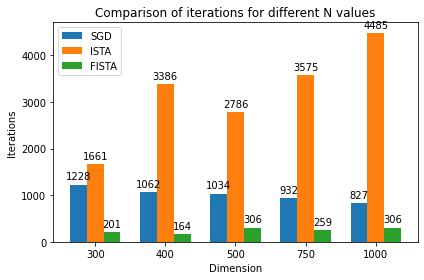

In [149]:
# Some results
# SGD without nesterov acceleration - tolerance level = 0.00001
# n = 300 (1228, 1661, 201)
# n = 400 (1062, 3386, 164)
# n = 500 (1034, 2786, 306)
# n = 750 (932, 3575, 259)
# n = 1000 (827, 4485, 306)
# Wih tolerance level = 1e ^(-8)
# n = 500 (1283, 6124, 458)
# n = 1000 (1154, 7675, 640)
# n = 2000 (1084, 11869, 1026)
epochs_vals = [1228, 1062, 1034, 932, 827]
ista_vals = [1661, 3386, 2786, 3575, 4485]
fista_vals = [201, 164, 306, 259, 306]
n = [300, 400, 500, 750, 1000]
x = np.arange(len(n))
width = 0.24
fig, ax = plt.subplots()
SGD = ax.bar(x - width, epochs_vals, width, label = 'SGD')
ISTA = ax.bar(x, ista_vals, width, label = 'ISTA')
FISTA = ax.bar(x + width, fista_vals, width, label = 'FISTA')
ax.set_ylabel('Iterations')
ax.set_title('Comparison of iterations for different N values')
ax.set_xticks(x)
ax.set_xticklabels(n)
ax.set_xlabel('Dimension')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.legend()
autolabel(SGD)
autolabel(ISTA)
autolabel(FISTA)
fig.tight_layout()
plt.show()

In [120]:
# Upper Bound in the QUB inequality
def Q(x, y, Lipschitz):
    norm = torch.norm(torch.matmul(A, y) - b)
    f_y = norm * norm
    term_1 = f_y
    
    grad = 2 * (torch.matmul(A, y) - b)
    inner_prod = torch.matmul((x - y).t(), grad)
    term_2 = inner_prod
    
    L = Lipschitz
    term_3 = L / 2. * (torch.matmul((x - y).t(), (x - y)))
    
    term_4 = lam * x.abs().sum()
    
    return term_1 + term_2 + term_3 + term_4

# Compute the expression p_(L)(y_k)
def p(y, Lip):
    step_size = 1 / Lip
    grad = 2 * torch.matmul(A.t(), torch.matmul(A, y) - b)
    y = y - step_size * grad
    y = proximal(y, step_size * lam)
    return y

# The objective function F
def F(y):
    norm = torch.norm(torch.matmul(A, y) - b)
    term_1 = norm * norm
    term_2 = lam * y.abs().sum()
    return term_1 + term_2
L

tensor(4012.5103)

In [131]:
# ISTA with backtracking approach, need to properly adjust the values for convergence
x_curr = torch.randn(n, )
y_curr =  x_curr
L_curr = 5.96
t = 1
eta = 1.7
back = 0
# 5.96, 1.7 leads to convergence in ISTA
def find(y, L_curr):
    power = 0
    L_now = L_curr
    while True:
        p_L = p(y, L_now)
        if objective(p_L).item() <= Q(p_L, y, L_now).item():
#             print("Found at power = {}".format(power))
            break
        power += 1
        L_now = L_now * eta
    return power, L_now

# find(y_curr, L_curr)
# F(p(y, L_curr)) <= Q(p(y, L_curr), y, L_curr)

# Stimulations for FISTA with Backtracking
# for i in range(4500):
#     loss = objective(x_curr)
#     loss_prev = loss
#     print("Loss is : {} Lipschitz constant is : {}".format(loss, L_curr))
    
#     L_curr = find(y_curr, L_curr)[1]
#     x_prev = x_curr # x_(k - 1)
#     x_curr = p(y_curr, L_curr) # x_k
    
#     t_prev = t # t_(k)
#     t_curr = (1 + math.sqrt(1 + 4 * math.pow(t, 2))) / 2. # t_(k + 1)
#     t = t_curr
    
#     y_curr = x_curr + (t_prev - 1.) / t_curr * (x_curr - x_prev) # y_(k + 1)
    
#     loss_new = objective(x_curr)
#     frac = (loss_prev - loss_new) / loss_prev
#     frac = frac.abs()
#     if frac.item() < eps:
#         break
#     back += 1

# Stimulations for ISTA with backtracking
for i in range(1000):
    loss = objective(x_curr)
    print("Loss is : {} Lipschitz constant is : {}".format(loss, L_curr))
    L_curr = find(x_curr, L_curr)[1]
    x_curr = p(x_curr, L_curr)

Loss is : 224478.484375 Lipschitz constant is : 5.96
Loss is : 244603.140625 Lipschitz constant is : 1201.5323646676038
Loss is : 652986.875 Lipschitz constant is : 1201.5323646676038
Loss is : 2337710.25 Lipschitz constant is : 1201.5323646676038
Loss is : 1429941.375 Lipschitz constant is : 2042.6050199349265
Loss is : 997240.125 Lipschitz constant is : 2042.6050199349265
Loss is : 742260.4375 Lipschitz constant is : 2042.6050199349265
Loss is : 575344.0625 Lipschitz constant is : 2042.6050199349265
Loss is : 458682.5 Lipschitz constant is : 2042.6050199349265
Loss is : 373395.625 Lipschitz constant is : 2042.6050199349265
Loss is : 308988.1875 Lipschitz constant is : 2042.6050199349265
Loss is : 259130.65625 Lipschitz constant is : 2042.6050199349265
Loss is : 219773.9375 Lipschitz constant is : 2042.6050199349265
Loss is : 188208.8125 Lipschitz constant is : 2042.6050199349265
Loss is : 162542.3125 Lipschitz constant is : 2042.6050199349265
Loss is : 141439.265625 Lipschitz constan

Loss is : 73.04750061035156 Lipschitz constant is : 2042.6050199349265
Loss is : 72.8370590209961 Lipschitz constant is : 2042.6050199349265
Loss is : 72.62857055664062 Lipschitz constant is : 2042.6050199349265
Loss is : 72.42190551757812 Lipschitz constant is : 2042.6050199349265
Loss is : 72.21701049804688 Lipschitz constant is : 2042.6050199349265
Loss is : 72.01380920410156 Lipschitz constant is : 2042.6050199349265
Loss is : 71.81246948242188 Lipschitz constant is : 2042.6050199349265
Loss is : 71.61443328857422 Lipschitz constant is : 2042.6050199349265
Loss is : 71.4183349609375 Lipschitz constant is : 2042.6050199349265
Loss is : 71.223876953125 Lipschitz constant is : 2042.6050199349265
Loss is : 71.03118896484375 Lipschitz constant is : 2042.6050199349265
Loss is : 70.84025573730469 Lipschitz constant is : 2042.6050199349265
Loss is : 70.65103149414062 Lipschitz constant is : 2042.6050199349265
Loss is : 70.4636459350586 Lipschitz constant is : 2042.6050199349265
Loss is : 7

Loss is : 51.234031677246094 Lipschitz constant is : 2042.6050199349265
Loss is : 51.202823638916016 Lipschitz constant is : 2042.6050199349265
Loss is : 51.1717414855957 Lipschitz constant is : 2042.6050199349265
Loss is : 51.14081573486328 Lipschitz constant is : 2042.6050199349265
Loss is : 51.110008239746094 Lipschitz constant is : 2042.6050199349265
Loss is : 51.07929992675781 Lipschitz constant is : 2042.6050199349265
Loss is : 51.04872512817383 Lipschitz constant is : 2042.6050199349265
Loss is : 51.018245697021484 Lipschitz constant is : 2042.6050199349265
Loss is : 50.98786163330078 Lipschitz constant is : 2042.6050199349265
Loss is : 50.95759582519531 Lipschitz constant is : 2042.6050199349265
Loss is : 50.92749786376953 Lipschitz constant is : 2042.6050199349265
Loss is : 50.897491455078125 Lipschitz constant is : 2042.6050199349265
Loss is : 50.867610931396484 Lipschitz constant is : 2042.6050199349265
Loss is : 50.83783721923828 Lipschitz constant is : 2042.6050199349265
L

Loss is : 45.721588134765625 Lipschitz constant is : 2042.6050199349265
Loss is : 45.71205520629883 Lipschitz constant is : 2042.6050199349265
Loss is : 45.70256042480469 Lipschitz constant is : 2042.6050199349265
Loss is : 45.693111419677734 Lipschitz constant is : 2042.6050199349265
Loss is : 45.6837043762207 Lipschitz constant is : 2042.6050199349265
Loss is : 45.674320220947266 Lipschitz constant is : 2042.6050199349265
Loss is : 45.66494369506836 Lipschitz constant is : 2042.6050199349265
Loss is : 45.655635833740234 Lipschitz constant is : 2042.6050199349265
Loss is : 45.64633560180664 Lipschitz constant is : 2042.6050199349265
Loss is : 45.63703155517578 Lipschitz constant is : 2042.6050199349265
Loss is : 45.62778091430664 Lipschitz constant is : 2042.6050199349265
Loss is : 45.61854553222656 Lipschitz constant is : 2042.6050199349265
Loss is : 45.60930252075195 Lipschitz constant is : 2042.6050199349265
Loss is : 45.60008239746094 Lipschitz constant is : 2042.6050199349265
Los

In [122]:
# Sample stimulations carried out to check the QUB Inequality
# def test():
#     y = torch.randn(n, )
#     x = torch.randn(n, )
#     for i in range(100):
# #         L = torch.randint(low = 0, high = 500, size = (1, ))
#         L = 100 * torch.randn(1, )
#         L = L.type(torch.FloatTensor)
#         p_L = p(y, L)
#         if objective(x).item() <= Q(x, y, L).item():
#             print("True at Lipschitz constant : {}".format(L))
#         else :
#             print("False at Lipschitz constant : {}".format(L))
# test()   